Model is valid? True
CPD for MachineHealth:
+------------------+-----+
| MachineHealth(0) | 0.8 |
+------------------+-----+
| MachineHealth(1) | 0.2 |
+------------------+-----+

CPD for ProductionDowntime:
+-----------------------+-----+----------------------+
| MachineHealth         | ... | MachineHealth(1)     |
+-----------------------+-----+----------------------+
| MaintenanceAction     | ... | MaintenanceAction(1) |
+-----------------------+-----+----------------------+
| ProductionDowntime(0) | ... | 0.7                  |
+-----------------------+-----+----------------------+
| ProductionDowntime(1) | ... | 0.3                  |
+-----------------------+-----+----------------------+

CPD for MaintenanceAction:
+----------------------+-----+
| MaintenanceAction(0) | 0.7 |
+----------------------+-----+
| MaintenanceAction(1) | 0.3 |
+----------------------+-----+

CPD for OperatorPresence:
+---------------------+-----------------------+-----------------------+
| ProductionDow

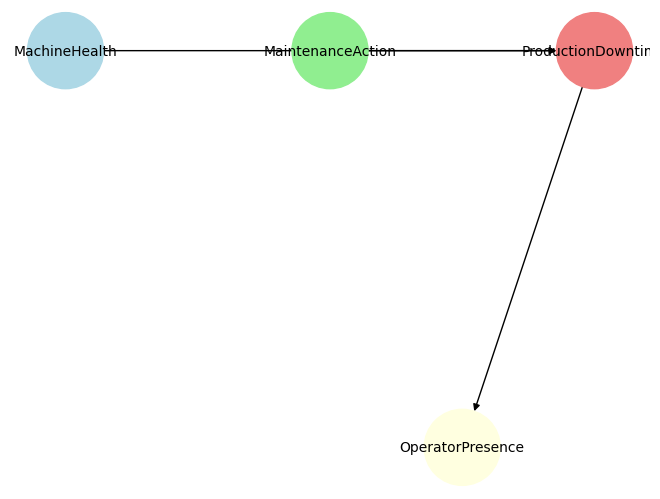

In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt
# Define the structure of the Bayesian network
model = BayesianNetwork([
('MachineHealth', 'ProductionDowntime'),
('MaintenanceAction', 'ProductionDowntime'),
('ProductionDowntime', 'OperatorPresence') ])

# Define conditional probability distributions (CPDs)
machine_health_cpd = TabularCPD(variable='MachineHealth', variable_card=2,values=[[0.8], [0.2]])

maintenance_action_cpd = TabularCPD(variable='MaintenanceAction', variable_card=2, values=[[0.7], [0.3]])

operator_presence_cpd = TabularCPD(variable='OperatorPresence',variable_card=2, values=[[0.9, 0.1], [0.1, 0.9]], # Updated CPD
evidence=['ProductionDowntime'],
evidence_card=[2])

production_downtime_cpd = TabularCPD(variable='ProductionDowntime',variable_card=2,values=[[0.95, 0.8, 0.9, 0.7],[0.05, 0.2, 0.1, 0.3]],evidence=['MachineHealth', 'MaintenanceAction'],
evidence_card=[2, 2])
# Associate CPDs with the model
model.add_cpds(machine_health_cpd, maintenance_action_cpd,operator_presence_cpd, production_downtime_cpd)
# Check if the model is valid
is_valid = model.check_model()
print("Model is valid?", is_valid)
# Create a VariableElimination object for inference
inference = VariableElimination(model)
# Specify the evidence for MachineHealth and MaintenanceAction
evidence = {'MachineHealth': 0, 'MaintenanceAction': 0}

# Specify the query variable
query_variable = 'ProductionDowntime'
# Perform inference to calculate the conditional probability
conditional_probability = inference.query(variables=[query_variable], evidence=evidence)
# Print CPDs
for node in model.nodes():
  print(f"CPD for {node}:\n{model.get_cpds(node)}\n")
# Print the query variable, evidence, and hidden variable
print(f"Query Variable: {query_variable}")
print(f"Evidence Variables: {', '.join(evidence.keys())}")
hidden_variable = [var for var in model.nodes() if var != query_variable and var not in evidence.keys()]
print(f"Hidden Variable: {', '.join(hidden_variable)}")
# Specify the evidence for MachineHealth and OperatorPresence
evidence = {'MachineHealth': 0, 'OperatorPresence': 1}
# Perform inference to calculate the conditional probability
conditional_probability = inference.query(variables=[query_variable], evidence=evidence)
# Print the conditional probability
print(f"\nConditional Probability of {query_variable} given MachineHealth='Good' and OperatorPresence='Present':")
print(conditional_probability.values)
# Create a directed graph from the model's edges
G = nx.DiGraph(model.edges())

# Specify a custom layout for the nodes
layout = {
'MachineHealth': (0, 0),
'MaintenanceAction': (1, 0),
'OperatorPresence': (1.5, -1),
'ProductionDowntime': (2, 0)
}
# Create a color dictionary for node colors
color_map = {'MachineHealth': 'lightblue', 'MaintenanceAction': 'lightgreen',
'OperatorPresence': 'lightyellow', 'ProductionDowntime': 'lightcoral'}
# Draw the graph with the specified layout and node colors
nx.draw(G, layout, with_labels=True, node_size=3000,
node_color=[color_map.get(node, 'lightgray') for node in G.nodes()], font_size=10)
plt.show()

In [2]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.3 MB/s eta 0:00:00
